<h2 style='font-family: Courier New; font-weight: 600; font-size: 20px; text-align: left'>1.0. Import Required Libraries</h2>

In [5]:
import warnings
from datetime import datetime
from typing import Dict, List, Optional

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pypalettes import load_cmap

# Suppress warnings
warnings.simplefilter("ignore")

# Pandas display options
pd.set_option("display.max_columns", 10)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
print("\n----- Libraries Loaded Successfully -----")
print(f"-----Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} -----\n")



----- Libraries Loaded Successfully -----
-----Timestamp: 2025-09-22 08:57:07 -----



<h2 style='font-family: Courier New; font-weight: 600; font-size: 20px; text-align: left'>2.0. Importing and Inspecting Dataset</h2>

In [28]:
def load_dataset(filepath: str) -> gpd.GeoDataFrame:
    gdf = gpd.read_file(filepath)
    gdf["salary"] = np.random.randint(400, 12000, size=len(gdf))

    gdf_projected = gdf.to_crs(epsg=3035)
    gdf_projected["centroid"] = gdf_projected.geometry.centroid
    gdf["centroid"] = gdf_projected["centroid"].to_crs(gdf.crs)

    return gdf

if __name__ == "__main__":
    gdf = load_dataset("./Datasets/Regions.shp")
    display(gdf.sample(15))

,Region_Cod,Region_Nam,geometry,salary,centroid
21,02,Arusha,"POLYGON ((36.41799 -2.34615, 36.4179 -2.34638,...",4541,POINT (35.9398 -2.95568)
18,10,Ruvuma,"POLYGON ((35.91608 -9.31468, 35.91783 -9.31741...",11991,POINT (36.20034 -10.72697)
0,06,Pwani,"MULTIPOLYGON (((39.32538 -8.29178, 39.32574 -8...",2815,POINT (38.64771 -7.24947)
28,53,Mjini Magharibi,"POLYGON ((39.28133 -6.03703, 39.28189 -6.03841...",11812,POINT (39.24859 -6.16757)
1,24,Simiyu,"POLYGON ((33.91068 -2.17986, 33.91654 -2.18068...",11747,POINT (34.29268 -3.03931)
9,07,Dar es salaam,"POLYGON ((39.12354 -6.56596, 39.12414 -6.56605...",2713,POINT (39.26155 -6.88455)
8,08,Lindi,"MULTIPOLYGON (((39.52994 -9.05015, 39.52989 -9...",4694,POINT (38.40026 -9.47541)
29,54,Kaskazini Pemba,"MULTIPOLYGON (((39.68012 -5.13723, 39.67964 -5...",7839,POINT (39.77096 -5.04312)
24,21,Manyara,"POLYGON ((37.20213 -3.45256, 37.20286 -3.45267...",964,POINT (36.55064 -4.52806)
19,19,Mwanza,"MULTIPOLYGON (((32.88348 -2.80783, 32.88173 -2...",2919,POINT (33.00493 -2.76604)


In [44]:
def dataset_overview(df: pd.DataFrame, width = 85):
    nrows, ncols = df.shape
    print("-" * width)
    print(f"{'Index':<6} | {'Column Name':<20} | {'Dtype':<10} | {'Non-Null':<10} | {'Nulls':<10} | {'Entries':<10} |")
    print("-" * width)

    for i, col in enumerate(df.columns):
        dtype = str(df[col].dtype)
        non_null = df[col].notnull().sum()
        nulls = df[col].isnull().sum()
        entries = len(df[col])
        print(f"{i:<6} | {col:<20} | {dtype:<10} | {non_null:<10} | {nulls:<10} | {entries:<10} |")

    print("-" * width)
    summary = f"Dataset has {nrows} entries and {ncols} columns | Total Memory Usage: {df.memory_usage(deep=True).sum()/1024:.1f} KB"
    print(summary.center(width))
    print("-" * width)
    
if __name__ == "__main__":
    dataset_overview(gdf)

-------------------------------------------------------------------------------------
Index  | Column Name          | Dtype      | Non-Null   | Nulls      | Entries    |
-------------------------------------------------------------------------------------
0      | Region_Cod           | object     | 30         | 0          | 30         |
1      | Region_Nam           | object     | 30         | 0          | 30         |
2      | geometry             | geometry   | 30         | 0          | 30         |
3      | salary               | int32      | 30         | 0          | 30         |
4      | centroid             | geometry   | 30         | 0          | 30         |
-------------------------------------------------------------------------------------
          Dataset has 30 entries and 5 columns | Total Memory Usage: 3.9 KB          
-------------------------------------------------------------------------------------


<h2 style='font-family: Courier New; font-weight: 600; font-size: 20px; text-align: left'>3.0. Configuration</h2>

In [46]:
TANZANIA_ZONES = {
    "Lake Zone": ["Kagera", "Geita", "Mwanza", "Mara", "Simiyu", "Shinyanga"],
    "Northern Zone": ["Arusha", "Kilimanjaro", "Tanga", "Manyara"],
    "Central Zone": ["Dodoma", "Singida", "Tabora"],
    "Southern Zone": ["Lindi", "Mtwara", "Ruvuma"],
    "Southern Highlands": ["Iringa", "Mbeya", "Njombe", "Songwe"],
    "Western Zone": ["Kigoma", "Tabora", "Katavi"],
    "Pemba": ["Kaskazini Pemba", "Kusini Pemba"],
    "Unguja": ["Mjini Magharibi", "Kusini Unguja", "Kaskazini Unguja"],
}

OUTPUT_PATH = './Outputs'
REGIONS_SHAPEFILE = "./Datasets/Regions.shp"

NameError: name 'random' is not defined

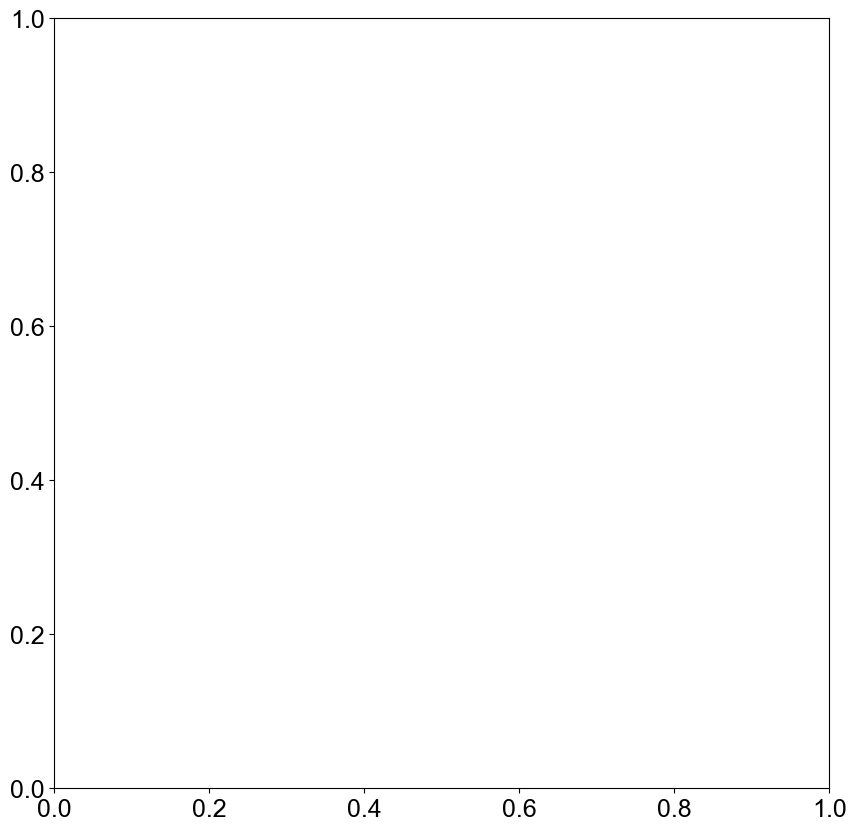

In [47]:

def annotate_regions(zone_gdf: gpd.GeoDataFrame, ax, color: str = "black", fontsize: int = 12):
    for _, row in zone_gdf.iterrows():
        try:
            point = row.geometry.representative_point()  # safer than centroid
            ax.text(
                point.x,
                point.y,
                row.get("Region_Nam", "Unknown"),
                fontsize=fontsize,
                ha="center",
                va="center",
                weight="bold",
                color=color,
            )
        except Exception as e:
            print(f"Skipping region due to geometry issue: {e}")


def add_footer_and_credits(fig, created_by: str = "Jabulente"):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M")
    footer_text = f"Data Source: World Bank | Created by: {created_by} | Generated: {timestamp}"
    fig.text(0.5, 0.02, footer_text, ha="center", va="center", fontsize=10, weight="bold", color="white", style="italic")

    # Credits
    credit_params = dict(x=0.98, ha="right", size=7, font="Arial", va="bottom", style="italic")
    fig.text(y=0.0489, s=f"Plotted By: {created_by}", **credit_params)
    fig.text(y=0.0349, s="Data Source: World Bank and NBS", **credit_params)
    fig.text(y=0.019, s="NOTE: Data Used for This Visualization Was Simulated", **credit_params)


def visualize_regions(
    gdf: gpd.GeoDataFrame,
    zones: Dict[str, List[str]],
    output_path: Optional[str] = None,
    cmap: str = "viridis"
):
    plt.rcParams.update({"font.family": "Arial", "font.size": 18})

    for zone_name, regions in zones.items():
        zone_gdf = gdf[gdf["Region_Nam"].isin(regions)]
        fig, ax = plt.subplots(figsize=(10, 10), facecolor="white")
        
        cmap_name = random.choice(plt.colormaps())
        zone_gdf.plot(ax=ax, column="salary", cmap='Oranges', edgecolor="black", linewidth=0.5, legend=False)
        annotate_regions(zone_gdf, ax, fontsize=14)

        # Add title
        title = f"Tanzania {zone_name} and Its Regions"
        fig.text(0.5, 0.95, title.upper(), color="black", fontweight="bold", ha="center", size=16)

        # Add footer & credits
        add_footer_and_credits(fig)

        # Clean axes
        ax.axis("off")
        fig.tight_layout()

        # Save if path provided
        if output_path:
            filename = f"{output_path}/{zone_name}.png"
            plt.savefig(filename, dpi=300, bbox_inches="tight")
            print(f"Saved map: {filename}")

        plt.show()


if __name__ == "__main__":
    gdf = load_dataset(REGIONS_SHAPEFILE)
    visualize_regions(gdf, TANZANIA_ZONES, OUTPUT_PATH)
